# Goal:
## Forecasting the returns of the Apple Stock data
## Returns means what is the percent change in stock price between one day and the next, it is represented by greater than or lesser than zero, if the price is increasing or not

In [19]:
## Importing all the necessary packages
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

## Warning Supression
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [20]:
def run_simulation(returns, prices, amt, order, thresh, verbose=False, plot=True):
    if type(order) == float:
        thresh = None
        
    curr_holding = False
    events_list = []
    init_amt = amt

    #go through dates
    for date, r in tqdm (returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        #if you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))
            
            if verbose:
                print('Sold at $%s'%sell_price)
                print('Predicted Return: %s'%round(pred,4))
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]
        
        if type(order) == tuple:
            try:
                #fit model
                model = ARIMA(curr_data, order=order).fit(maxiter=200)

                #get forecast
                pred = model.forecast()[0][0]

            except:
                pred = thresh - 1



        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding) and \
        ((type(order) == float and np.random.random() < order) 
         or (type(order) == tuple and pred > thresh)
         or (order == 'last' and curr_data[-1] > 0)):
            
            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)
                
    if verbose:
        print('Total Amount: $%s'%round(amt,2))
        
    #graph
    if plot:
    
        plt.figure(figsize=(10,4))
        plt.plot(prices[14:])

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims), 
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s"%(tickerSymbol, thresh, round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()
    
    return amt

## Reading the Apple Stock Data

In [21]:
tickerSymbol = 'AAPL'
data = yf.Ticker(tickerSymbol)

In [40]:
#### Apple stock data is taken from 1st January 2022 to 31st December 2022

In [41]:
prices = data.history(start='2022-01-01', end='2022-12-31').Close
returns = prices.pct_change().dropna()

### The below Graph represents Price of Apple stock everyday in that time period mentioned above

Text(0, 0.5, 'Prices')

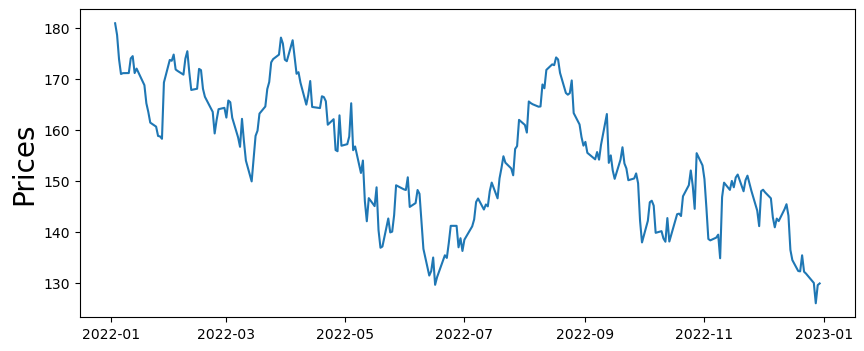

In [42]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

### The below Graph represents returns of Apple stock everyday
### Greater than zero indicates that the price is increasing and less than zero represents the price reducing

Text(0, 0.5, 'Returns')

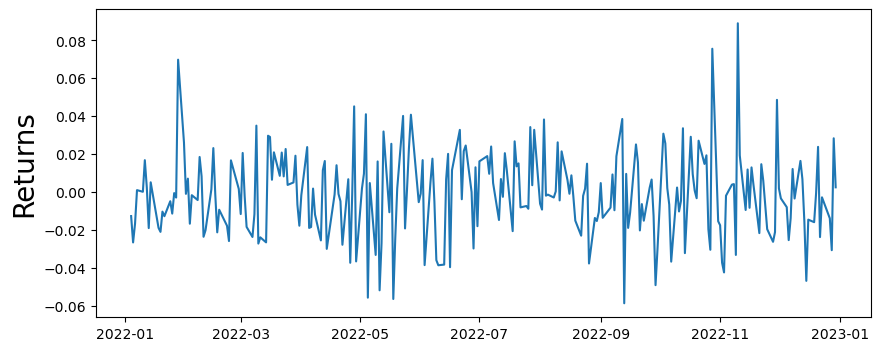

In [44]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns', fontsize=20)

## Auto correlation function plot

In [ ]:
## We narrow down the focus to the spikes that are out of the blue window

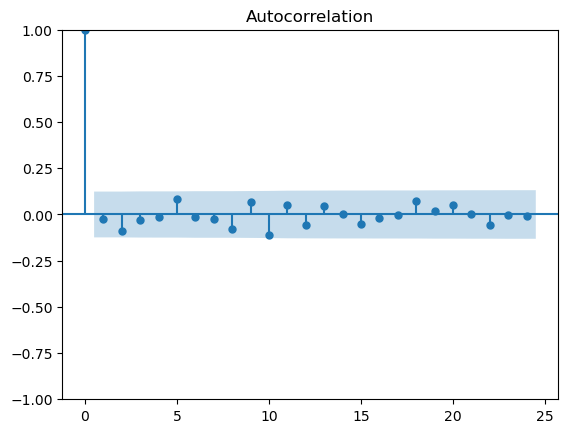

In [31]:
plot_acf(returns)
plt.show()

/Users/sharanyasenthil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


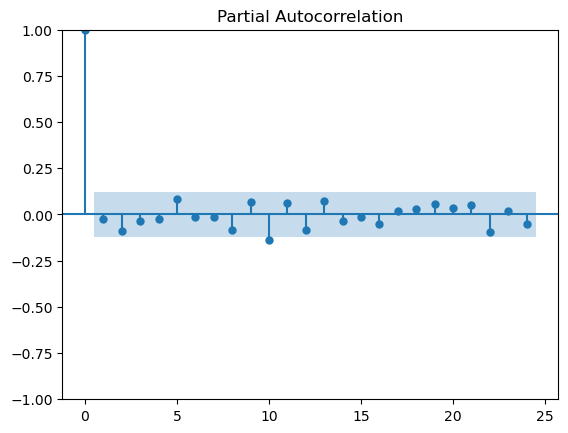

In [32]:
plot_pacf(returns)
plt.show()

## Baseline Model : Random Buying

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 11485.24it/s]


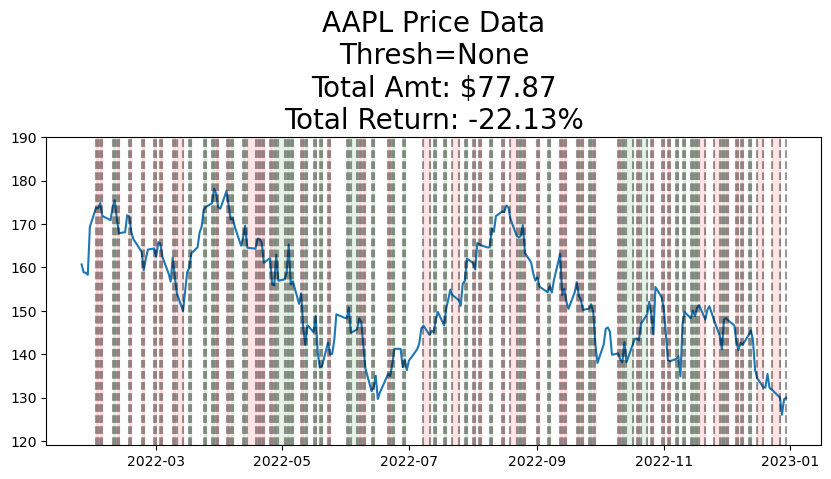

77.86691206413032

In [33]:
run_simulation(returns, prices, 100, 0.5, None, verbose=False)

In [34]:
final_amts = [run_simulation(returns, prices, 100, 0.5, None, verbose=False, plot=False) for _ in range(1000)]

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 20374.11it/s]


100%|██████████████████████████████████████| 236/236 [00:00<00:00, 20994.65it/s]


100%|██████████████████████████████████████| 236/236 [00:00<00:00, 20881.27it/s]


100%|██████████████████████████████████████| 236/236 [00:00<00:00, 20260.68it/s]


100%|██████████████████████████████████████| 236/236 [00:00<00:00, 20346.89it/s]


100%|██████████████████████████████████████| 236/236 [00:00<00:00, 20117.38it/s]


100%|██████████████████████████████████████| 236/236 [00:00<00:00, 21118.72it/s]


100%|██████████████████████████████████████| 236/236 [00:00<00:00, 19341.43it/s]


100%|██████████████████████████████████████| 236/236 [00:00<00:00, 19565.07it/s]


100%|██████████████████████████████████████| 236/236 [00:00<00:00, 20112.48it/s]


/Users/sharanyasenthil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Avg: $95.09\nSD: $15.82')

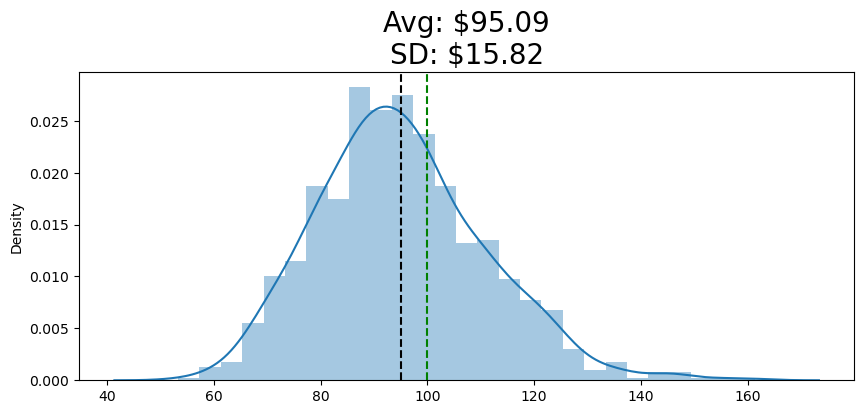

In [35]:
plt.figure(figsize=(10,4))
sns.distplot(final_amts)
plt.axvline(np.mean(final_amts), color='k', linestyle='--')
plt.axvline(100, color='g', linestyle='--')
plt.title('Avg: $%s\nSD: $%s'%(round(np.mean(final_amts),2), round(np.std(final_amts),2)), fontsize=20)

## If Last Return was Positive, Buy

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 12053.63it/s]


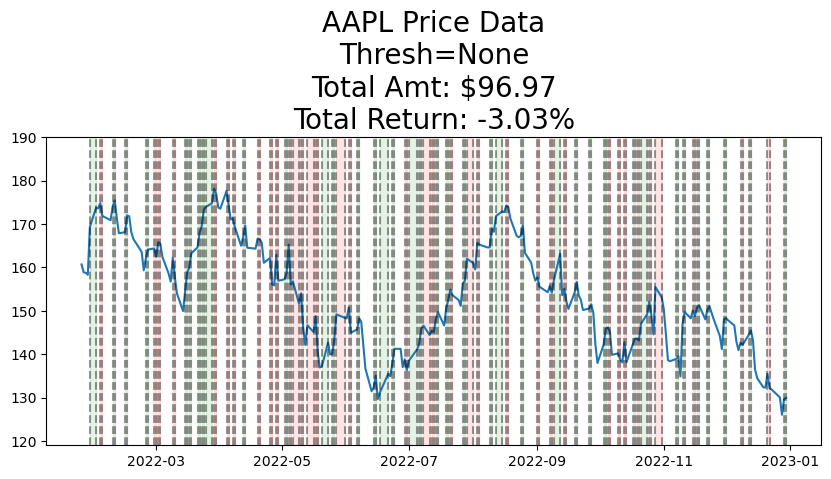

96.9733254949548

In [36]:
run_simulation(returns, prices, 100, 'last', None, verbose=False)

## Try AR(1) Model

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 11047.62it/s]


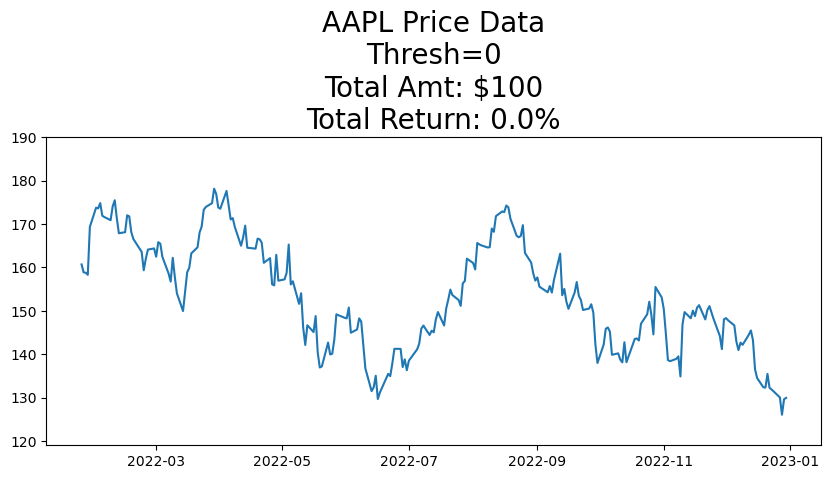

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 19199.25it/s]


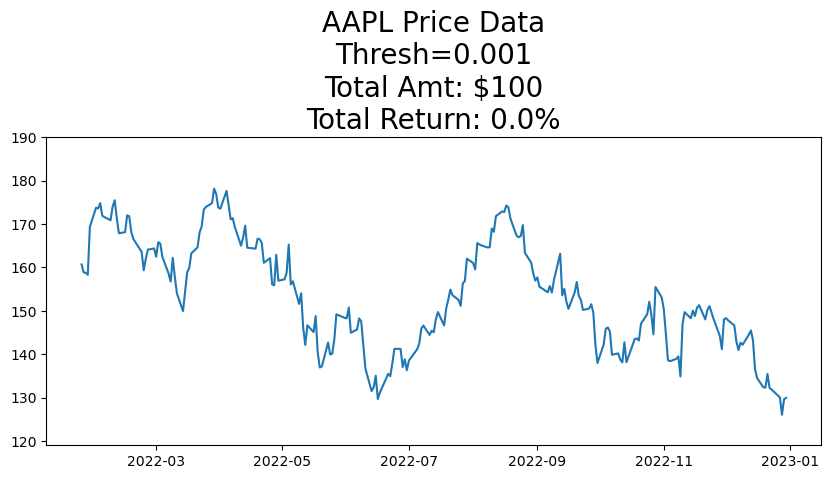

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 20451.99it/s]


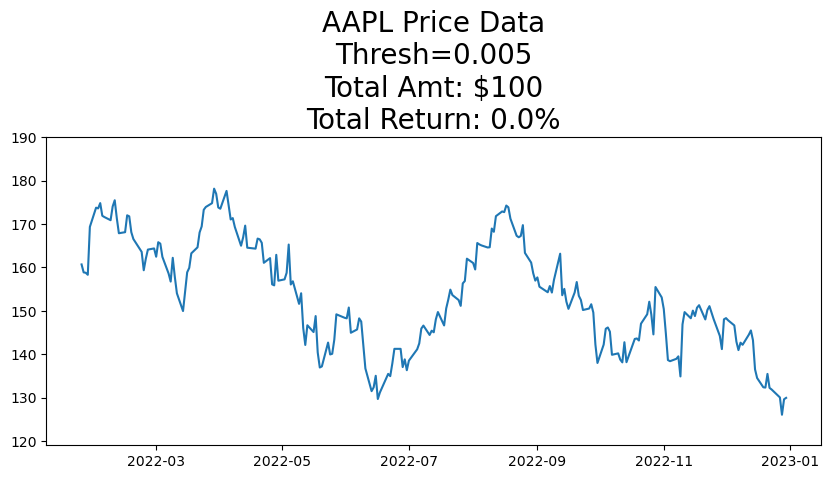

In [37]:
for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 100, (1,0,0), thresh, verbose=False)

## Try AR(5) Model

100%|███████████████████████████████████████| 236/236 [00:00<00:00, 9322.87it/s]


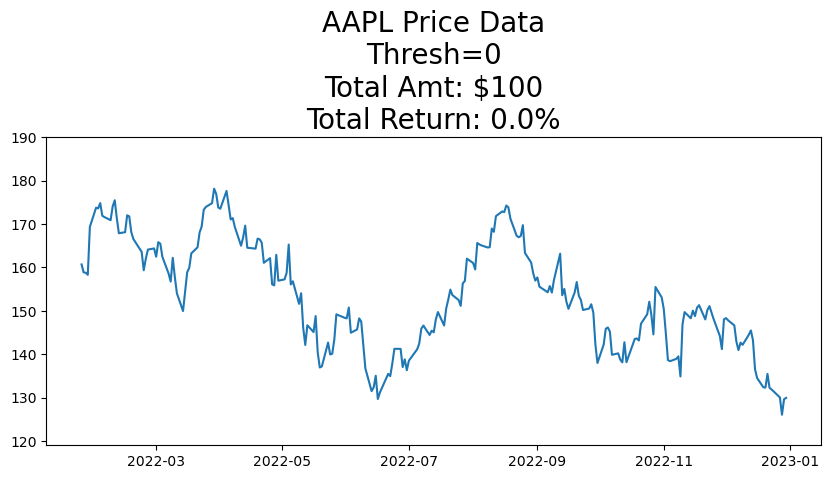

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 19954.36it/s]


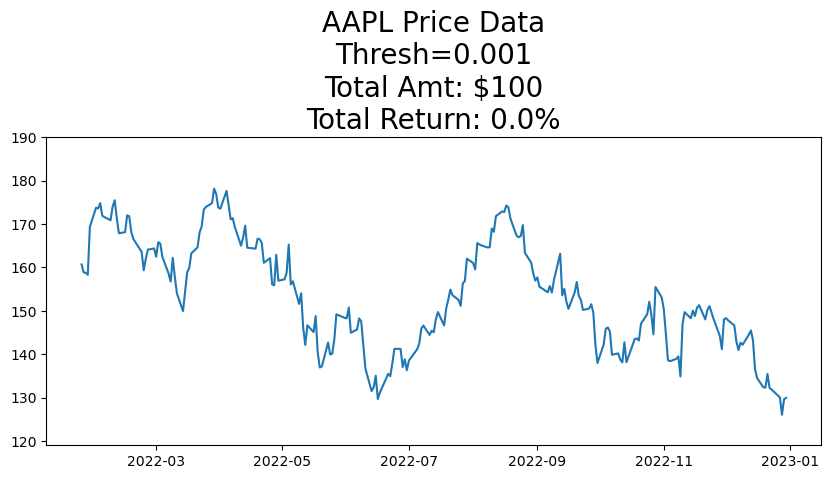

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 20341.45it/s]


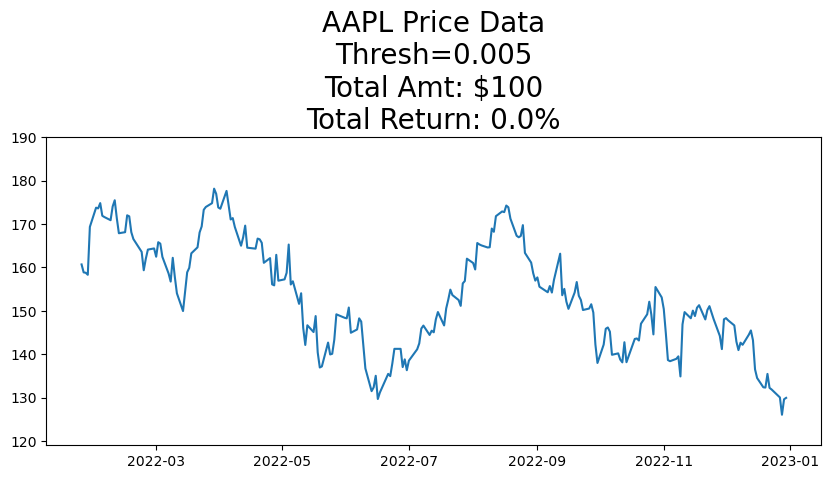

In [38]:
for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 100, (5,0,0), thresh, verbose=False)

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 14570.63it/s]


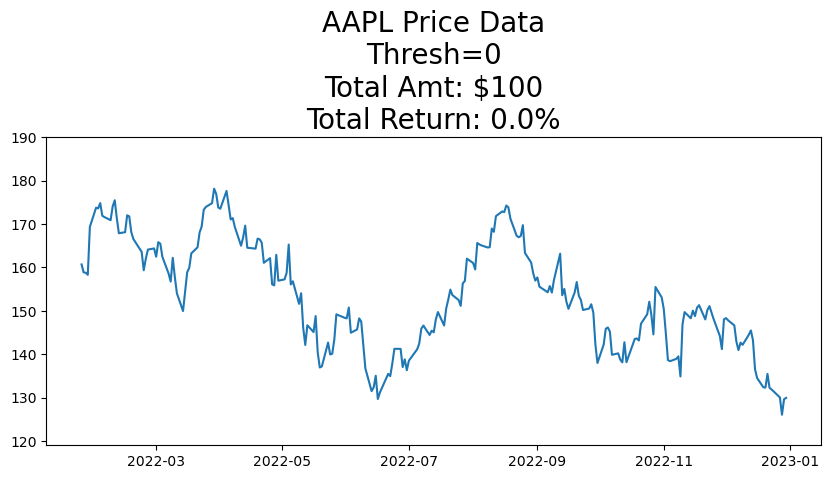

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 18570.71it/s]


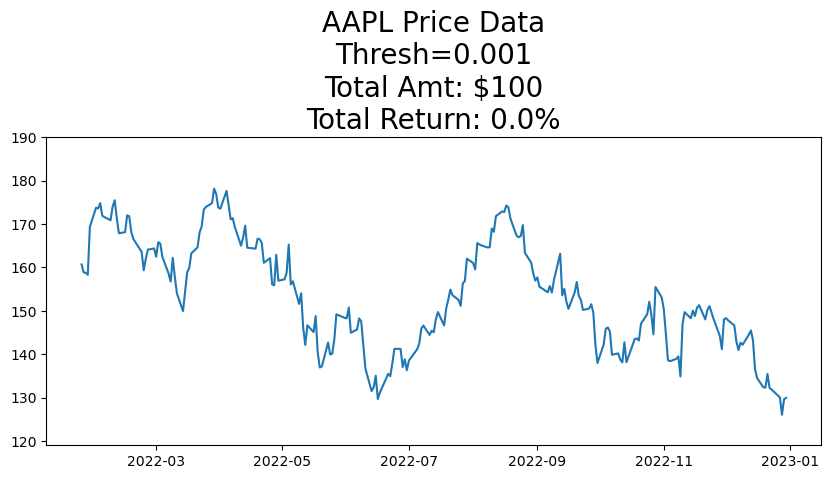

100%|██████████████████████████████████████| 236/236 [00:00<00:00, 19406.27it/s]


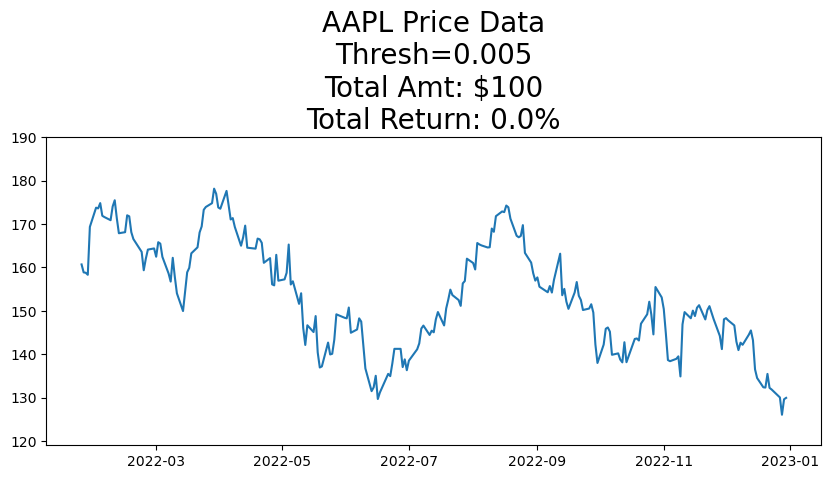

In [39]:
for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 100, (5,0,5), thresh, verbose=False)